In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [21]:
df_orig = pd.read_csv("adult.csv", skipinitialspace=True)
df_orig

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [22]:
for col in df_orig.columns:
    print(f"Column: {col}")
    print(f"Type: {df_orig[col].dtype}")
    missing_values = df_orig[col].isnull().sum()
    print(f"Missing values: {missing_values}")
    if df_orig[col].dtype == 'object':
        unique_values = df_orig[col].nunique()
        print(f"Unique values: {unique_values}")
        print(f"Values: {df_orig[col].unique()}")
    else:
        print(f"Min: {df_orig[col].min()}")
        print(f"Max: {df_orig[col].max()}")
        print(f"Mean: {df_orig[col].mean()}")
        print(f"Std: {df_orig[col].std()}")
    print("-" * 40)

Column: age
Type: int64
Missing values: 0
Min: 17
Max: 90
Mean: 38.58164675532078
Std: 13.640432553581343
----------------------------------------
Column: workclass
Type: object
Missing values: 0
Unique values: 9
Values: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
----------------------------------------
Column: fnlwgt
Type: int64
Missing values: 0
Min: 12285
Max: 1484705
Mean: 189778.36651208502
Std: 105549.97769702224
----------------------------------------
Column: education
Type: object
Missing values: 0
Unique values: 16
Values: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
----------------------------------------
Column: education.num
Type: int64
Missing values: 0
Min: 1
Max: 16
Mean: 10.0806793403151
Std: 2.5727203320673877
----------------------------------------
Column: marital.sta

In [23]:
num_cols = df_orig.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df_orig.select_dtypes(include=["object"]).columns.tolist()

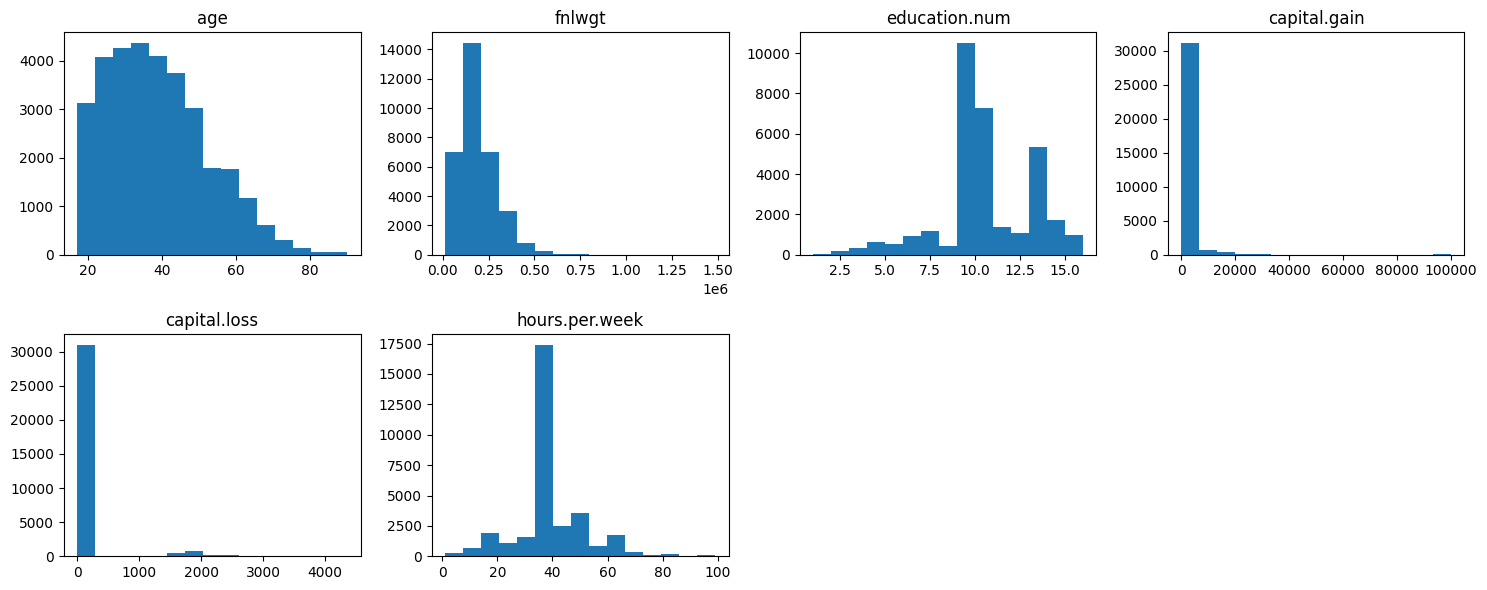

In [25]:
# Plot histograms for numerical columns
df_orig[num_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4), grid=False)
plt.tight_layout()

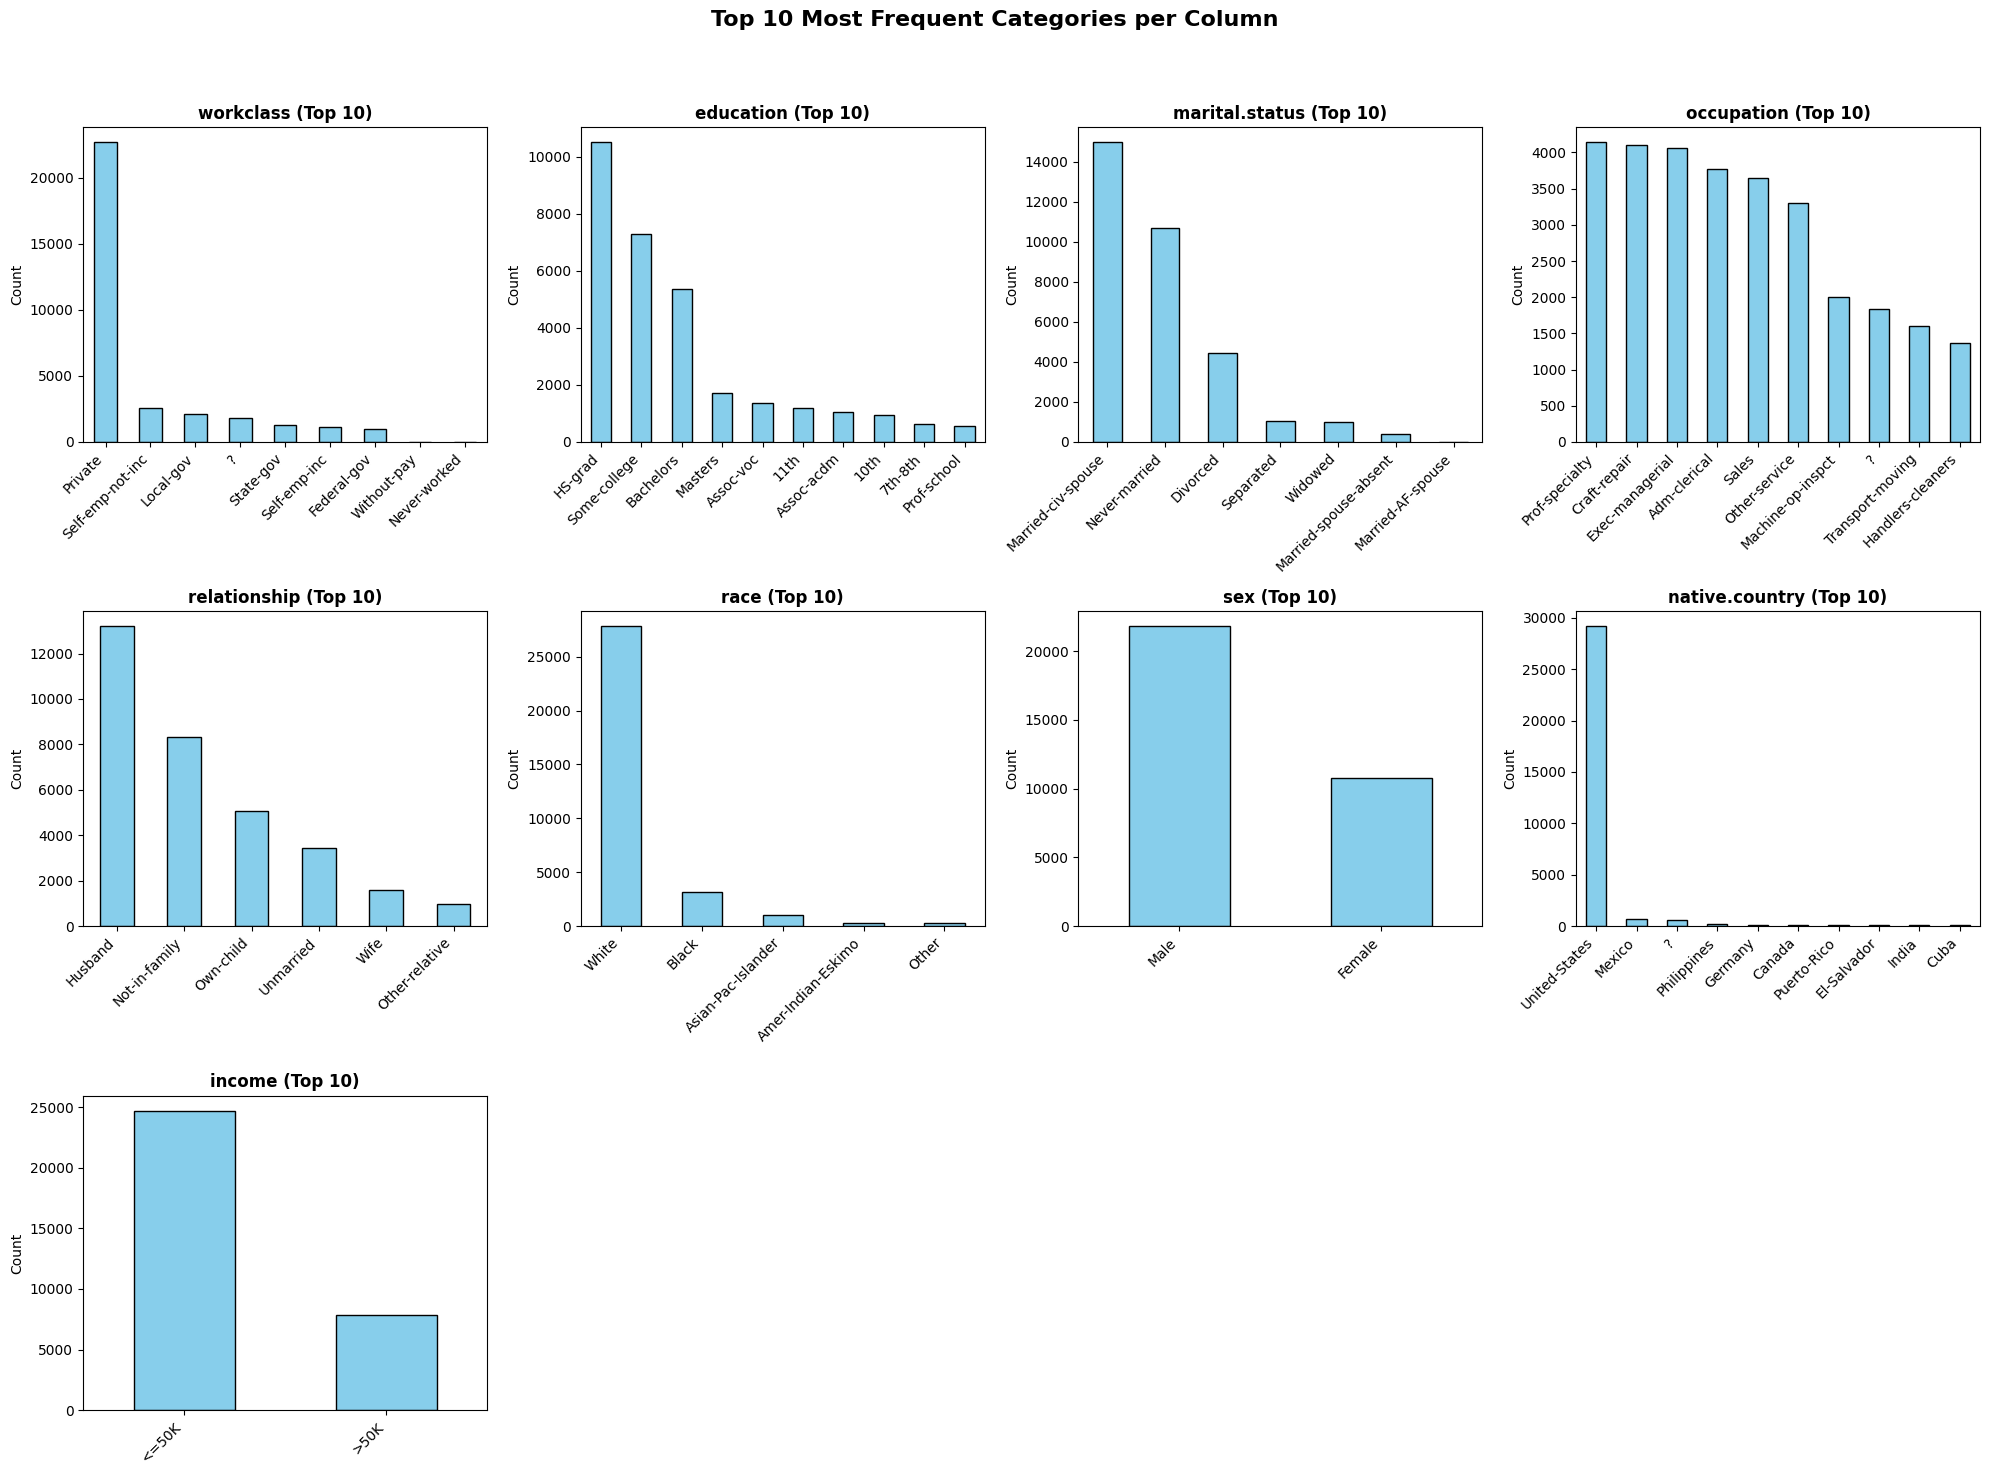

In [26]:
# Plot bar charts for categorical columns with top 10 most frequent values
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols[:len(axes)]):
    value_counts = df_orig[col].value_counts().nlargest(10)
    value_counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f"{col} (Top 10)", fontsize=12, weight='bold')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Top 10 Most Frequent Categories per Column", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Numericke kolone:
- diskretne:
    - age
    - education.num
    - hours.per.week
- kontniualne:
    - fnlwgt
    - capital.gain
    - capital.loss

Kategoricke kolone:
- ordinalni:
    - education
    - income
- nominalni:
    - workclass
    - marital.status
    - occupation
    - relationship
    - race
    - sex
    - native.country

Uklanjanje duplikata

In [27]:
# Drop duplicate rows and reset index and print the number of rows before and after
print(f"Number of rows before dropping duplicates: {len(df_orig):,}")
df_orig.drop_duplicates(inplace=True)
df_orig.reset_index(drop=True, inplace=True)
print(f"Number of rows after dropping duplicates: {len(df_orig):,}")

Number of rows before dropping duplicates: 32,561
Number of rows after dropping duplicates: 32,537


Zamena "?" vrednosti sa simbolom nedostajuce vrednosti

In [28]:
df_orig.replace('?', np.nan, inplace=True)

Popunjavanje ili uklanjanje nedostajućih vrednosti

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

# Copy the original dataset
df = df_orig.copy()

# Add random missing values
np.random.seed(42)
for col in num_cols:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Utility function to visualize missing values
def plot_missing(df_before, df_after, title_before, title_after):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    df_before.isna().sum().plot(kind='bar', color='tomato', ax=axes[0])
    axes[0].set_title(title_before)
    axes[0].set_ylabel("Number of Missing Values")

    df_after.isna().sum().plot(kind='bar', color='skyblue', ax=axes[1])
    axes[1].set_title(title_after)
    plt.tight_layout()
    plt.show()

# Initial state
print("Initial missing values:")
print(df.isna().sum()[df.isna().sum() > 0])
plot_missing(df, df, "Missing Values (Before)", "Same State")

# Mean Imputation
df_mean = df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_mean[num_cols] = mean_imputer.fit_transform(df_mean[num_cols])

print("\nAfter Mean Imputation:")
print(df_mean.isna().sum()[df_mean.isna().sum() > 0])
plot_missing(df, df_mean, "Before Mean Imputation", "After Mean Imputation")

# Median Imputation
df_median = df.copy()
median_imputer = SimpleImputer(strategy='median')
df_median[num_cols] = median_imputer.fit_transform(df_median[num_cols])

print("\nAfter Median Imputation:")
print(df_median.isna().sum()[df_median.isna().sum() > 0])
plot_missing(df, df_median, "Before Median Imputation", "After Median Imputation")

# Most Frequent Imputation (for categorical)
df_mode = df.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode[cat_cols] = mode_imputer.fit_transform(df_mode[cat_cols])

print("\nAfter Most Frequent Imputation:")
print(df_mode.isna().sum()[df_mode.isna().sum() > 0])
plot_missing(df, df_mode, "Before Most Frequent Imputation", "After Most Frequent Imputation")

# KNN Imputation (for numeric columns)
df_knn = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[num_cols] = knn_imputer.fit_transform(df_knn[num_cols])

print("\nAfter KNN Imputation:")
print(df_knn.isna().sum()[df_knn.isna().sum() > 0])
plot_missing(df, df_knn, "Before KNN Imputation", "After KNN Imputation")

# Removal of rows with missing values
df_removed = df.copy().dropna()

print(f"\nAfter Removal of Missing Values:")
print(f"Remaining rows: {len(df_removed)} / {len(df)}")
plot_missing(df, df_removed, "Before Removal", "After Removal (All NaNs Dropped)")


Detekcija i obrada outlajera

In [ ]:
from scipy import stats

df = df_orig.copy()

# --- Z-SCORE METHOD ---
zscore_df = df.copy()
z_threshold = 3
z_removed = {}

for col in num_cols:
    z_scores = np.abs(stats.zscore(zscore_df[col].dropna()))
    mask = z_scores < z_threshold
    z_removed[col] = len(z_scores) - np.sum(mask)
    zscore_df = zscore_df.loc[mask]

print("Z-Score method removed outliers per column:")
for k, v in z_removed.items():
    print(f"  {k}: {v} outliers removed")

# --- IQR METHOD ---
iqr_df = df.copy()
iqr_removed = {}

for col in num_cols:
    Q1 = iqr_df[col].quantile(0.25)
    Q3 = iqr_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    mask = (iqr_df[col] >= lower) & (iqr_df[col] <= upper)
    iqr_removed[col] = (~mask).sum()
    iqr_df = iqr_df[mask]

print("\nIQR method removed outliers per column:")
for k, v in iqr_removed.items():
    print(f"  {k}: {v} outliers removed")

# --- VISUAL METHOD (BOX-PLOT) ---
fig, axes = plt.subplots(nrows=len(num_cols), ncols=3, figsize=(18, 4 * len(num_cols)))
fig.suptitle("Outlier Detection: Z-Score vs IQR vs Original (Boxplots)", fontsize=16, weight="bold")

for i, col in enumerate(num_cols):
    # Original data
    axes[i, 0].boxplot(df[col].dropna(), patch_artist=True)
    axes[i, 0].set_title(f"Original: {col}")

    # Z-score cleaned
    axes[i, 1].boxplot(zscore_df[col].dropna(), patch_artist=True)
    axes[i, 1].set_title(f"Z-Score Cleaned: {col}")

    # IQR cleaned
    axes[i, 2].boxplot(iqr_df[col].dropna(), patch_artist=True)
    axes[i, 2].set_title(f"IQR Cleaned: {col}")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Transformacija podataka

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder

df = df_orig.copy()

# --- NORMALIZATION (Min–Max scaling to [0,1]) ---
scaler_minmax = MinMaxScaler()
df_norm = df.copy()
df_norm[num_cols] = scaler_minmax.fit_transform(df[num_cols])
print("Normalization (Min-Max) done")

# --- STANDARDIZATION (Z-score scaling, mean=0, std=1) ---
scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df[num_cols])
print("Standardization (Z-score) done")

# --- LOG TRANSFORMATION (for skewed numeric data) ---
df_log = df.copy()
for col in num_cols:
    # Shift if negative or zero values exist
    if (df_log[col] <= 0).any():
        df_log[col] = np.log1p(df_log[col] - df_log[col].min() + 1)
    else:
        df_log[col] = np.log1p(df_log[col])
print("Log transformation applied (log1p with shift if needed)")

# --- LABEL ENCODING (for ordinal-like single-column categorical data) ---
label_encoders = {}
df_label = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col].astype(str))
    label_encoders[col] = le
print("Label encoding done")

# --- ONE-HOT ENCODING (for nominal categorical variables) ---
df_onehot = pd.get_dummies(df, columns=cat_cols, drop_first=False)
print("One-hot encoding done")

# --- ORDINAL ENCODING (for ordered categories, if known) ---
ord_maps = {
    'education': ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
                  'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Prof-school', 'Masters', 'Doctorate']
}

df_ordinal = df.copy()
categories = [ord_maps[col] for col in ord_maps]
ordinal_encoder = OrdinalEncoder(categories=categories)
df_ordinal[list(ord_maps.keys())] = ordinal_encoder.fit_transform(df_ordinal[list(ord_maps.keys())])
print("Ordinal encoding done (for mapped columns)")


In [ ]:
import seaborn as sns

# === NUMERICAL TRANSFORMATIONS ===
fig, axes = plt.subplots(nrows=len(num_cols), ncols=4, figsize=(15, 5 * len(num_cols)))
fig.suptitle("Numerical Transformations: Original vs Normalized vs Standardized vs Log", fontsize=16, weight='bold')

for i, col in enumerate(num_cols):
    # --- Original ---
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='cornflowerblue')
    axes[i, 0].set_title(f"Original: {col}")
    
    # --- Normalized ---
    sns.histplot(df_norm[col], kde=True, ax=axes[i, 1], color='mediumseagreen')
    axes[i, 1].set_title("Normalized (Min-Max)")
    
    # --- Standardized ---
    sns.histplot(df_std[col], kde=True, ax=axes[i, 2], color='indianred')
    axes[i, 2].set_title("Standardized (Z-Score)")
    
    # --- Log transformed ---
    sns.histplot(df_log[col], kde=True, ax=axes[i, 3], color='goldenrod')
    axes[i, 3].set_title("Log")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# === CATEGORICAL ENCODINGS ===
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=3, figsize=(16, 4 * len(cat_cols)))
fig.suptitle("Categorical Encodings: Original vs Label vs Ordinal", fontsize=16, weight='bold')

for i, col in enumerate(cat_cols):
    # --- Original ---
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10], ax=axes[i, 0], palette='Blues')
    axes[i, 0].set_title(f"Original: {col}")

    # --- Label Encoded ---
    sns.histplot(df_label[col], kde=False, bins=len(df_label[col].unique()), ax=axes[i, 1], color='orange')
    axes[i, 1].set_title("Label Encoded")

    # --- Ordinal Encoded ---
    if col in ord_maps:
        sns.histplot(df_ordinal[col], kde=False, bins=len(df_ordinal[col].unique()), ax=axes[i, 2], color='green')
        axes[i, 2].set_title("Ordinal Encoded")
    else:
        axes[i, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# === ONE-HOT ENCODING EXAMPLE ===
sample_onehot_cols = [col for col in df_onehot.columns if any(base in col for base in cat_cols[:1])][:10]
plt.figure(figsize=(12, 6))
sns.heatmap(df_onehot[sample_onehot_cols].head(10), annot=True, cmap='coolwarm', cbar=False)
plt.title(f"Example of One-Hot Encoded Columns ({cat_cols[0]})", fontsize=14, weight='bold')
plt.xlabel("Encoded Columns")
plt.ylabel("Sample Rows")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = df_orig.copy()

# --- CORRELATION MATRIX ---
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Numerical Features", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

# --- PCA ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols].dropna())

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 5))
explained_var = np.cumsum(pca.explained_variance_ratio_) * 100
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o', linestyle='--', color='navy')
plt.title("PCA - Cumulative Explained Variance", fontsize=14, weight='bold')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Scree plot (variance per component) ---
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_ * 100, color='teal', alpha=0.7)
plt.title("PCA Scree Plot - Variance by Component", fontsize=14, weight='bold')
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained (%)")
plt.tight_layout()
plt.show()

# Combine PCA results with target
pca_columns = [f"PC{i+1}" for i in range(pca_data.shape[1])]
df_pca = pd.DataFrame(pca_data, columns=pca_columns)

# Try to find a categorical or target-like column for color
possible_targets = [c for c in df.columns if c.lower() in ['target', 'class', 'label', 'income', 'y']]
if possible_targets:
    df_pca['target'] = df[possible_targets[0]]
    hue_col = 'target'
else:
    hue_col = None

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue=hue_col,
    palette="viridis",
    alpha=0.8,
    s=60,
    edgecolor='k'
)

plt.title("PCA Visualization - First Two Principal Components", fontsize=15, weight='bold')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.grid(True, linestyle='--', alpha=0.5)
if hue_col:
    plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

print("PCA and Correlation Matrix completed successfully.")


In [ ]:
# Merge PCA (PC1, PC2) with categorical columns
df_pca_vis = pd.concat([df_pca[['PC1', 'PC2']], df[cat_cols].reset_index(drop=True)], axis=1)

n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.scatterplot(
        data=df_pca_vis,
        x='PC1',
        y='PC2',
        hue=col,
        palette='tab10',
        s=40,
        alpha=0.8,
        ax=axes[i],
        edgecolor='black',
        linewidth=0.4,
        legend=False
    )
    axes[i].set_title(f"PCA Colored by '{col}'", fontsize=12, weight='bold')
    axes[i].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    axes[i].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    axes[i].grid(True, linestyle='--', alpha=0.4)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("PCA Visualization - First Two Components Colored by Each Categorical Feature", 
             fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Agregacija podataka

In [ ]:
from IPython.display import display

employees = pd.DataFrame({
    'emp_id': [1, 2, 3, 4],
    'name': ['Ana', 'Bojan', 'Ceca', 'Dragan']
})

departments = pd.DataFrame({
    'dept_id': [10, 20, 30],
    'department': ['HR', 'Finance', 'IT'],
    'emp_id': [2, 3, 5]
})

print("Employees Table:")
display(employees)
print("Departments Table:")
display(departments)

# --- INNER JOIN ---
inner_join = pd.merge(employees, departments, on='emp_id', how='inner')
print("INNER JOIN - Only matching rows (intersection):")
display(inner_join)

# --- LEFT JOIN ---
left_join = pd.merge(employees, departments, on='emp_id', how='left')
print("LEFT JOIN - All employees, add matching department info if available:")
display(left_join)

# --- RIGHT JOIN ---
right_join = pd.merge(employees, departments, on='emp_id', how='right')
print("RIGHT JOIN - All departments, add matching employee info if available:")
display(right_join)

# --- OUTER JOIN ---
outer_join = pd.merge(employees, departments, on='emp_id', how='outer', indicator=True)
print("OUTER JOIN - All rows from both tables (union):")
display(outer_join)